In [ ]:
!pip install tensorflow


In [ ]:
!pip install emoji

     |████████████████████████████████| 170 kB 14.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=53f659ebe717483266aa7dcfd72af99d12d23711b0e3d21e4f0eb500480150c3
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
root_path = 'drive/My Drive/text_to_emoji/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys

In [ ]:
sys.path.append('/content/drive/text_to_emoji/emo_utils.py')

In [ ]:
sys.path.insert(0,'/content/drive/My Drive/ColabNotebooks')

In [ ]:
import emojis_utils

In [ ]:
from google.colab import files
files.upload() 

Saving test_utils.py to test_utils.py


{'test_utils.py': b'from termcolor import colored\n\nfrom tensorflow.keras.layers import Input\nfrom tensorflow.keras.layers import Conv2D\nfrom tensorflow.keras.layers import MaxPooling2D\nfrom tensorflow.keras.layers import Dropout \nfrom tensorflow.keras.layers import Conv2DTranspose\nfrom tensorflow.keras.layers import concatenate\nfrom tensorflow.keras.layers import ZeroPadding2D\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.layers import LSTM\nfrom tensorflow.keras.layers import RepeatVector\n\n\n# Compare the two inputs\ndef comparator(learner, instructor):\n    for a, b in zip(learner, instructor):\n        if tuple(a) != tuple(b):\n            print(colored("Test failed", attrs=[\'bold\']),\n                  "\\n Expected value \\n\\n", colored(f"{b}", "green"), \n                  "\\n\\n does not match the input value: \\n\\n", \n                  colored(f"{a}", "red"))\n            raise AssertionError("Error in test") \n    print(colored("All tests pa

In [ ]:
import test_utils

In [ ]:
import numpy as np
from emojis_utils import *
import emoji
import matplotlib.pyplot as plt
from test_utils import *

%matplotlib inline

In [ ]:
X_train, Y_train = read_csv('/content/drive/My Drive/text_to_emoji/data/train_emoji.csv')
X_test, Y_test = read_csv('/content/drive/My Drive/text_to_emoji/data/tesss.csv')

In [ ]:
maxlen = len(max(X_train, key=len).split())

In [ ]:
for indx in range(5,10):
    print(X_train[indx], label_to_emoji(Y_train[indx]))

I love you mum ❤️
Stop saying bullshit 😞
congratulations on your acceptance 😄
The assignment is too long  😞
I want to go play ⚾


In [ ]:
Y_oh_train = convert_to_one_hot(Y_train, C=5) #since the class have only 5 labels for now, 
Y_oh_test = convert_to_one_hot(Y_test, C=5)   #the one hot encoding is 1*5 that is (1,5) 
                                              #(indicating that there are 5 emojis to choose from).

In [ ]:
idx = 20
print(f"Sentence '{X_train[50]}' has label index {Y_train[idx]}, which is emoji {label_to_emoji(Y_train[idx])}", )
print(f"Label index {Y_train[idx]} in one-hot encoding format is {Y_oh_train[idx]}")

Sentence 'I missed you' has label index 3, which is emoji 😞
Label index 3 in one-hot encoding format is [0. 0. 0. 1. 0.]


In [ ]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('/content/drive/My Drive/text_to_emoji/data/glove.6B.50d.txt')

In [ ]:
word = 'cucumber'
indx = 246267
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(idx) + "th word in the vocabulary is", index_to_word[idx])

the index of cucumber in the vocabulary is 113317
the 20th word in the vocabulary is #d


In [ ]:
def sentence_avg(sentence, word_to_vec_map):
    any_word = list(word_to_vec_map.keys())[0]
    words = sentence.lower().split() # Spliting sentence into list of lower case words
    avg = np.zeros(word_to_vec_map[any_word].shape)
    count = 0

    for w in words: #avg the word vectors
        if w in word_to_vec_map: 
            avg += word_to_vec_map[w]
            count += 1
    if count > 0:
        avg = avg / count
    return avg    

𝑧(𝑖)=𝑊𝑎𝑣𝑔(𝑖)+𝑏
 
𝑎(𝑖)=𝑠𝑜𝑓𝑡𝑚𝑎𝑥(𝑧(𝑖))

cost(Li) = -sigma(Yoh*log(a))

In [ ]:
def model(X, Y, word_to_vec_map, learning_rate=0.01, num_iterations = 500):

    any_word = list(word_to_vec_map.keys())[0]
    cost = 0
    m = Y.shape[0]                           # number of training examples
    n_y = len(np.unique(Y))                  # number of classes 
    n_h = word_to_vec_map[any_word].shape[0] # dimensions of the GloVe vectors 
    
    W = np.random.randn(n_y,n_h)/np.sqrt(n_h)
    b = np.zeros((n_y,))

    Y_oh = convert_to_one_hot(Y, C = n_y) #Converting Y to Y_onehot with n_y classes

    for t in range(num_iterations):
        for i in range(m):

            avg = sentence_avg(X[i], word_to_vec_map)
            z = np.dot(W,avg) + b
            a = softmax(z)
            cost = -(np.sum(Y_oh * np.log(a)))
            
            #calculating gradients
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1,n_h))
            db = dz

            W = W - learning_rate * dW    
            b = b - learning_rate * db 

        if t % 100 == 0:
            print('Epochs: ' + str(t) + '----cost = ' + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map)   
    return pred, W, b                     

In [ ]:
np.random.seed()
pred, W, b = model(X_train, Y_train, word_to_vec_map)
print(pred)

Epochs: 0----cost = 210.84379414902997
Accuracy: 0.36363636363636365
Epochs: 100----cost = 420.1965958529487
Accuracy: 0.9318181818181818
Epochs: 200----cost = 480.6554125579614
Accuracy: 0.9621212121212122
Epochs: 300----cost = 513.380947592036
Accuracy: 0.9696969696969697
Epochs: 400----cost = 536.0115304789749
Accuracy: 0.9772727272727273
[[3.]
 [2.]
 [3.]
 [0.]
 [4.]
 [0.]
 [3.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [1.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [4.]
 [3.]
 [3.]
 [4.]
 [0.]
 [3.]
 [4.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [0.]
 [3.]
 [2.]
 [4.]
 [3.]
 [0.]
 [3.]
 [3.]
 [3.]
 [4.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [3.]
 [1.]
 [0.]
 [0.]
 [0.]
 [3.]
 [4.]
 [4.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [0.]
 [0.]
 [3.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [4.]
 [3.]
 [3.]
 [2.]
 [4.]
 [0.]
 [0.]
 [3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [3.]
 [2.]
 [2.]
 [2.]
 [4.]
 [

In [ ]:
print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9772727272727273
Test set:
Accuracy: 0.8928571428571429


In [ ]:
X_my_sentences = np.array(["i adore you", "i hate you", "funny lol", "lets play ", "food is ready", "not feeling happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.8333333333333334

i adore you ❤️
i hate you 😞
funny lol 😄
lets play  ⚾
food is ready 🍴
not feeling happy 😞


           ❤️     ⚾      😄      😞     🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    0    1    0    7
1            0    8    0    0    0    8
2            1    0   17    0    0   18
3            1    1    2   12    0   16
4            0    0    0    0    7    7
All          8    9   19   13    7   56


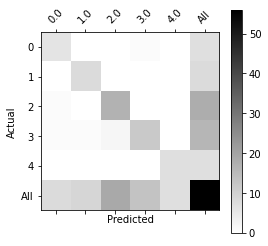

In [ ]:
print('           '+  label_to_emoji(0)  + '     ' +  label_to_emoji(1)  + '      ' +  label_to_emoji(2)  + '      ' + label_to_emoji(3)  + '     ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)